#### Tabela 1. Sejam os valores os dados abaixo

In [2]:
import pandas as pd
import numpy as np

# Criando o DataFrame
dados = {
    "X": [0,1,2,3,4,5,6,7,12],
    "Y1": [9.6,8.4,12.6,15.1,22.8,19.1,21.6,24.0,33.6],
    "Y2": [10.4,11.2,12.8,13.9,17.2,21.6,22.4,22.9,35.4],
    "Y3": [10.4,11.4,15.0,15.9,18.6,21.5,21.7,25.3,30.6],
    "Y4": [18.8,15.4,13.7,11.9,9.1,11.6,8.9,12.2,16.8]
}
df = pd.DataFrame(dados)

#### a) Determinar a covariância de X e Y

In [3]:
# Covariância de X com cada Y
covariancias = {col: np.cov(df["X"], df[col])[0,1] for col in df.columns if col != "X"}
covariancias

{'Y1': np.float64(28.133333333333333),
 'Y2': np.float64(28.627777777777773),
 'Y3': np.float64(23.520833333333336),
 'Y4': np.float64(-1.6152777777777778)}

#### b) Determinar as variâncias de X e Y

In [4]:
variancias = {col: np.var(df[col], ddof=1) for col in df.columns}
variancias

{'X': np.float64(13.277777777777779),
 'Y1': np.float64(64.28750000000001),
 'Y2': np.float64(62.98027777777777),
 'Y3': np.float64(43.155),
 'Y4': np.float64(11.24277777777778)}

#### c) Determinar o coeficiente de correlação de X e Y

In [5]:
correlacoes = {col: np.corrcoef(df["X"], df[col])[0,1] for col in df.columns if col != "X"}
correlacoes

{'Y1': np.float64(0.9629311263433227),
 'Y2': np.float64(0.989971412337834),
 'Y3': np.float64(0.9825947653459562),
 'Y4': np.float64(-0.13220494720980736)}

#### d) Determine os coeficientes do modelo de regressão linear simples

In [6]:
from sklearn.linear_model import LinearRegression

modelos = {}
for col in ["Y1","Y2","Y3","Y4"]:
    X = df[["X"]]
    y = df[col]
    reg = LinearRegression().fit(X, y)
    modelos[col] = {"intercepto": reg.intercept_, "coeficiente": reg.coef_[0]}

modelos

{'Y1': {'intercepto': np.float64(9.116317991631796),
  'coeficiente': np.float64(2.1188284518828455)},
 'Y2': {'intercepto': np.float64(9.061924686192471),
  'coeficiente': np.float64(2.1560669456066943)},
 'Y3': {'intercepto': np.float64(11.060251046025105),
  'coeficiente': np.float64(1.7714435146443515)},
 'Y4': {'intercepto': np.float64(13.69623430962343),
  'coeficiente': np.float64(-0.12165271966527193)}}

#### e) Represente graficamente a reta

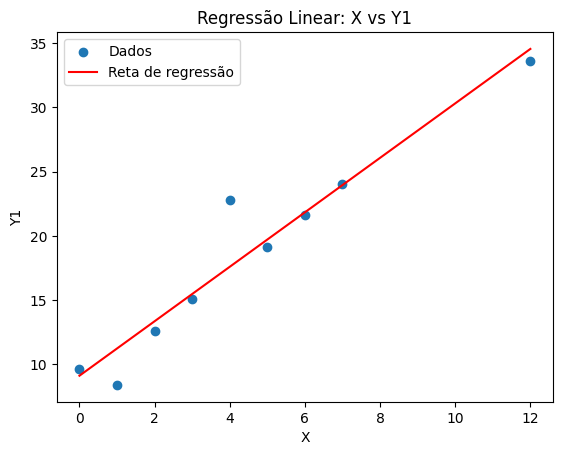

In [7]:
import matplotlib.pyplot as plt

col = "Y1"  # escolha a variável dependente (pode trocar para Y2, Y3, Y4)
X = df[["X"]]
y = df[col]
reg = LinearRegression().fit(X, y)

plt.scatter(X, y, label="Dados")
plt.plot(X, reg.predict(X), color="red", label="Reta de regressão")
plt.title(f"Regressão Linear: X vs {col}")
plt.xlabel("X")
plt.ylabel(col)
plt.legend()
plt.show()

#### f) Faça a análise dos resíduos

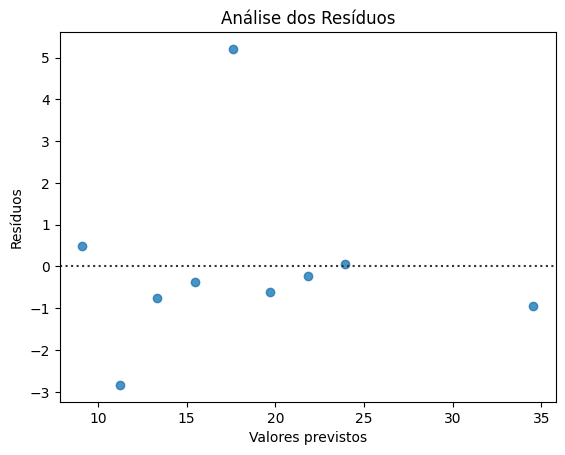

count    9.000000e+00
mean     2.565849e-15
std      2.162821e+00
min     -2.835146e+00
25%     -7.539749e-01
50%     -3.728033e-01
75%      5.188285e-02
max      5.208368e+00
Name: Y1, dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = reg.predict(X)
residuos = y - y_pred

sns.residplot(x=y_pred, y=residuos, line_kws={'color':'red'})
plt.title("Análise dos Resíduos")
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos")
plt.show()

residuos.describe()

### i) Os resíduos ordinários (ei)

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Criando DataFrame
dados = {
    "X": [0, 1, 2, 3, 4, 5, 6, 7, 12],
    "Y1": [9.6, 8.4, 12.6, 15.1, 22.8, 19.1, 21.6, 24.0, 33.6],
    "Y2": [10.4, 11.2, 12.8, 13.9, 17.2, 21.6, 22.4, 22.9, 35.4],
    "Y3": [10.4, 11.4, 15.0, 15.9, 18.6, 21.5, 21.7, 25.3, 30.6],
    "Y4": [18.8, 15.4, 13.7, 11.9, 9.1, 11.6, 8.9, 12.2, 16.8]
}
df = pd.DataFrame(dados)

# Calcular resíduos ordinários
residuos_ordinarios = {}

for col in ["Y1", "Y2", "Y3", "Y4"]:
    X_vals = df[["X"]]
    y_vals = df[col]

    reg = LinearRegression().fit(X_vals, y_vals)
    y_pred = reg.predict(X_vals)
    e_i = y_vals - y_pred  # cálculo do resíduo ordinário

    residuos_ordinarios[col] = e_i

# Criar DataFrame com resíduos
residuos_df = pd.DataFrame(residuos_ordinarios)
residuos_df["X"] = df["X"]
residuos_df = residuos_df[["X", "Y1", "Y2", "Y3", "Y4"]]
residuos_df.rename(columns={
    "Y1": "Resíduo_Y1",
    "Y2": "Resíduo_Y2",
    "Y3": "Resíduo_Y3",
    "Y4": "Resíduo_Y4"
}, inplace=True)

residuos_df


,X,Resíduo_Y1,Resíduo_Y2,Resíduo_Y3,Resíduo_Y4
0,0,0.483682,1.338075,-0.660251,5.103766
1,1,-2.835146,-0.017992,-1.431695,1.825418
2,2,-0.753975,-0.574059,0.396862,0.247071
3,3,-0.372803,-1.630126,-0.474582,-1.431276
4,4,5.208368,-0.486192,0.453975,-4.109623
5,5,-0.610460,1.757741,1.582531,-1.487971
6,6,-0.229289,0.401674,0.011088,-4.066318
7,7,0.051883,-1.254393,1.839644,-0.644665
8,12,-0.942259,0.465272,-1.717573,4.563598


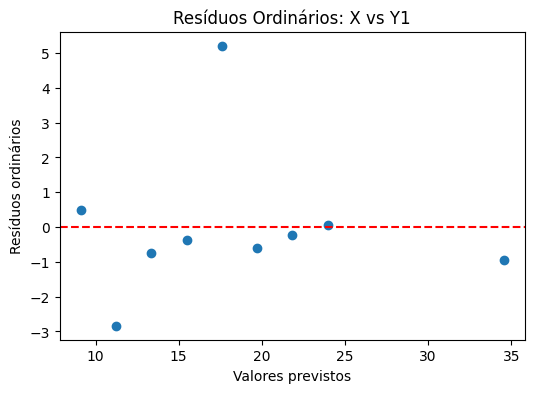

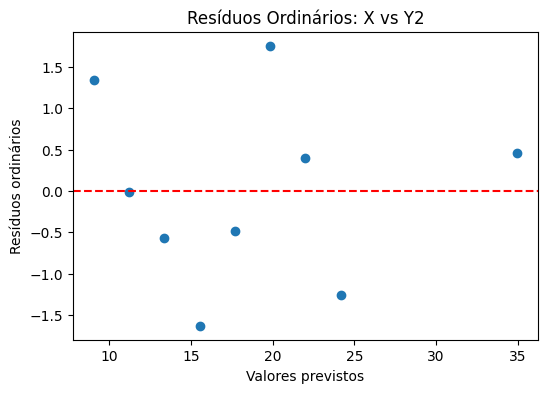

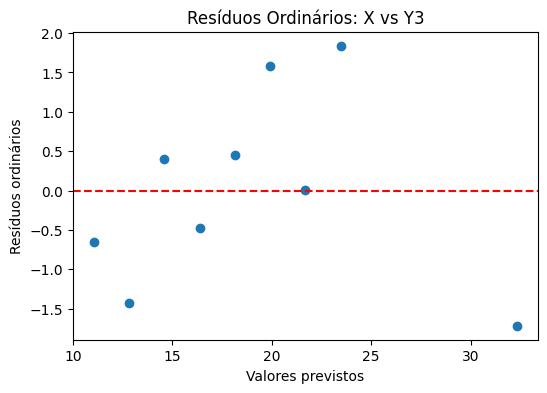

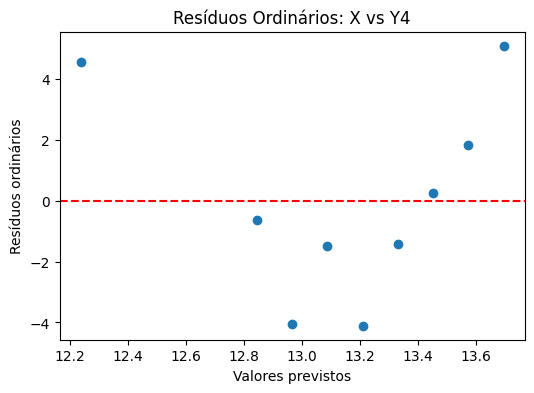

In [21]:
for col in ["Y1", "Y2", "Y3", "Y4"]:
    X_vals = df[["X"]]
    y_vals = df[col]
    reg = LinearRegression().fit(X_vals, y_vals)
    y_pred = reg.predict(X_vals)
    e_i = y_vals - y_pred

    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, e_i)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"Resíduos Ordinários: X vs {col}")
    plt.xlabel("Valores previstos")
    plt.ylabel("Resíduos ordinários")
    plt.show()


### ii) Os resíduos estudentizados (zi)

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Criando DataFrame
dados = {
    "X": [0, 1, 2, 3, 4, 5, 6, 7, 12],
    "Y1": [9.6, 8.4, 12.6, 15.1, 22.8, 19.1, 21.6, 24.0, 33.6],
    "Y2": [10.4, 11.2, 12.8, 13.9, 17.2, 21.6, 22.4, 22.9, 35.4],
    "Y3": [10.4, 11.4, 15.0, 15.9, 18.6, 21.5, 21.7, 25.3, 30.6],
    "Y4": [18.8, 15.4, 13.7, 11.9, 9.1, 11.6, 8.9, 12.2, 16.8]
}
df = pd.DataFrame(dados)

In [23]:
residuos_estud = {}

for col in ["Y1", "Y2", "Y3", "Y4"]:
    X_vals = sm.add_constant(df["X"])  # adiciona intercepto
    y_vals = df[col]

    # Ajustar modelo
    modelo_sm = sm.OLS(y_vals, X_vals).fit()

    # Resíduos estudentizados
    z_i = modelo_sm.get_influence().resid_studentized_internal
    residuos_estud[col] = z_i

# Montar DataFrame com resultados
residuos_estud_df = pd.DataFrame(residuos_estud)
residuos_estud_df["X"] = df["X"]
residuos_estud_df = residuos_estud_df[["X", "Y1", "Y2", "Y3", "Y4"]]
residuos_estud_df.rename(columns={
    "Y1": "ResíduoEstud_Y1",
    "Y2": "ResíduoEstud_Y2",
    "Y3": "ResíduoEstud_Y3",
    "Y4": "ResíduoEstud_Y4"
}, inplace=True)

residuos_estud_df


,X,ResíduoEstud_Y1,ResíduoEstud_Y2,ResíduoEstud_Y3,ResíduoEstud_Y4
0,0,0.249510,1.331629,-0.603650,1.713291
1,1,-1.390893,-0.017028,-1.244848,0.582764
2,2,-0.357366,-0.524913,0.333383,0.076206
3,3,-0.172939,-1.458841,-0.390185,-0.432064
4,4,2.391752,-0.430723,0.369483,-1.228087
5,5,-0.280497,1.558118,1.288757,-0.444916
6,6,-0.106557,0.360119,0.009133,-1.229734
7,7,0.024669,-1.150623,1.550266,-0.199467
8,12,-0.687406,0.654824,-2.220783,2.166521


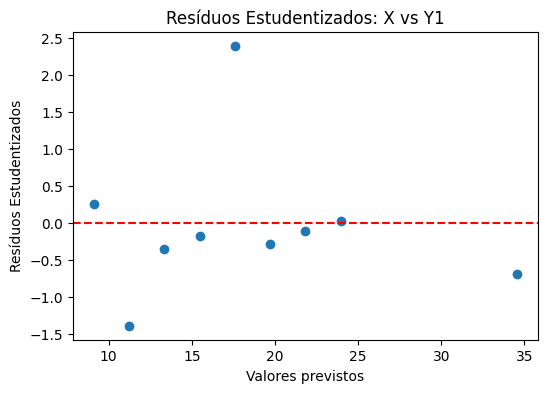

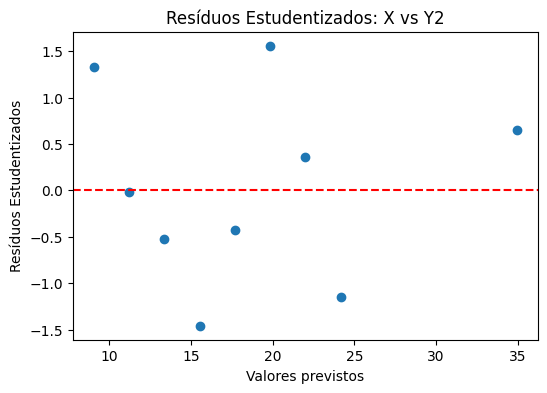

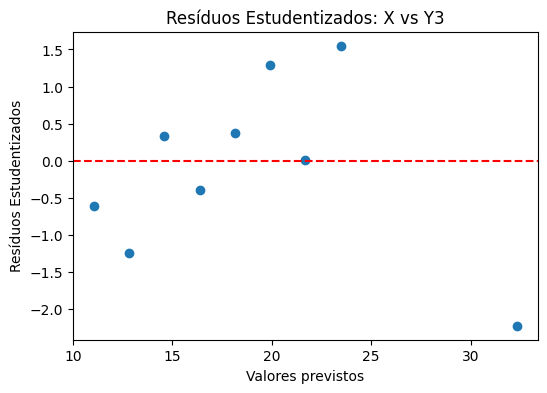

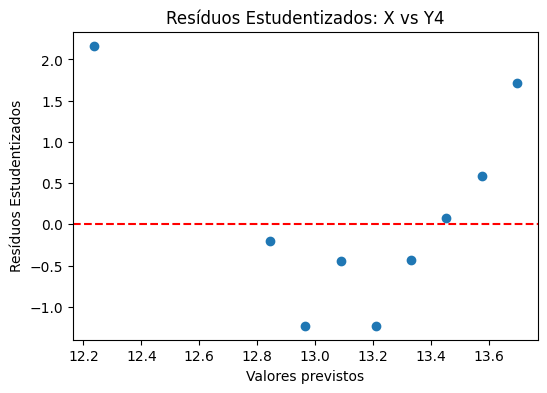

In [24]:
for col in ["Y1", "Y2", "Y3", "Y4"]:
    X_vals = sm.add_constant(df["X"])
    y_vals = df[col]
    modelo_sm = sm.OLS(y_vals, X_vals).fit()

    z_i = modelo_sm.get_influence().resid_studentized_internal
    y_pred = modelo_sm.fittedvalues

    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, z_i)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"Resíduos Estudentizados: X vs {col}")
    plt.xlabel("Valores previstos")
    plt.ylabel("Resíduos Estudentizados")
    plt.show()


### iii) Os resíduos padronizados externamente (Zi*)

In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados
dados = {
    "X": [0, 1, 2, 3, 4, 5, 6, 7, 12],
    "Y1": [9.6, 8.4, 12.6, 15.1, 22.8, 19.1, 21.6, 24.0, 33.6],
    "Y2": [10.4, 11.2, 12.8, 13.9, 17.2, 21.6, 22.4, 22.9, 35.4],
    "Y3": [10.4, 11.4, 15.0, 15.9, 18.6, 21.5, 21.7, 25.3, 30.6],
    "Y4": [18.8, 15.4, 13.7, 11.9, 9.1, 11.6, 8.9, 12.2, 16.8]
}
df = pd.DataFrame(dados)
df


,X,Y1,Y2,Y3,Y4
0,0,9.6,10.4,10.4,18.8
1,1,8.4,11.2,11.4,15.4
2,2,12.6,12.8,15.0,13.7
3,3,15.1,13.9,15.9,11.9
4,4,22.8,17.2,18.6,9.1
5,5,19.1,21.6,21.5,11.6
6,6,21.6,22.4,21.7,8.9
7,7,24.0,22.9,25.3,12.2
8,12,33.6,35.4,30.6,16.8


In [26]:
residuos_pad_ext = {}

for col in ["Y1", "Y2", "Y3", "Y4"]:
    X_vals = sm.add_constant(df["X"])  # adiciona intercepto
    y_vals = df[col]

    modelo_sm = sm.OLS(y_vals, X_vals).fit()

    # resíduos padronizados externamente
    Zi_star = modelo_sm.get_influence().resid_studentized_external
    residuos_pad_ext[col] = Zi_star

# Montar DataFrame com resultados
residuos_pad_ext_df = pd.DataFrame(residuos_pad_ext)
residuos_pad_ext_df["X"] = df["X"]
residuos_pad_ext_df = residuos_pad_ext_df[["X", "Y1", "Y2", "Y3", "Y4"]]
residuos_pad_ext_df.rename(columns={
    "Y1": "ResíduoPadExt_Y1",
    "Y2": "ResíduoPadExt_Y2",
    "Y3": "ResíduoPadExt_Y3",
    "Y4": "ResíduoPadExt_Y4"
}, inplace=True)

residuos_pad_ext_df


,X,ResíduoPadExt_Y1,ResíduoPadExt_Y2,ResíduoPadExt_Y3,ResíduoPadExt_Y4
0,0,0.232035,1.426732,-0.574011,2.081594
1,1,-1.513776,-0.015765,-1.306110,0.553120
2,2,-0.333916,-0.495831,0.311133,0.070583
3,3,-0.160453,-1.618973,-0.365235,-0.405456
4,4,5.179267,-0.404163,0.345460,-1.283652
5,5,-0.261162,1.784885,1.366194,-0.417863
6,6,-0.098732,0.336537,0.008455,-1.285848
7,7,0.022840,-1.183000,1.771168,-0.185198
8,12,-0.659047,0.625717,-3.782627,3.494548


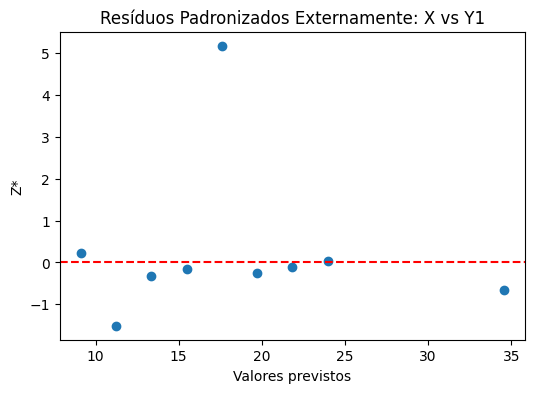

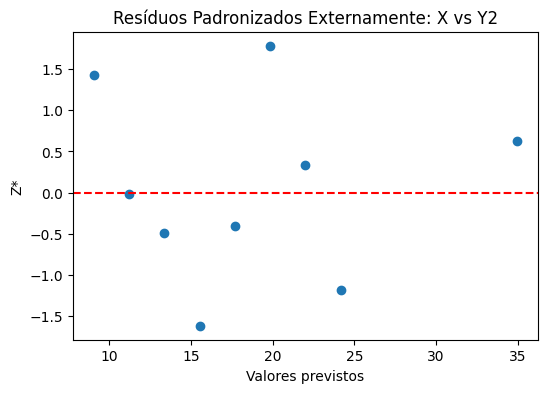

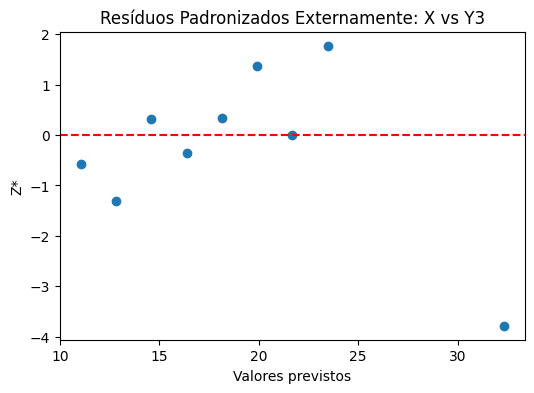

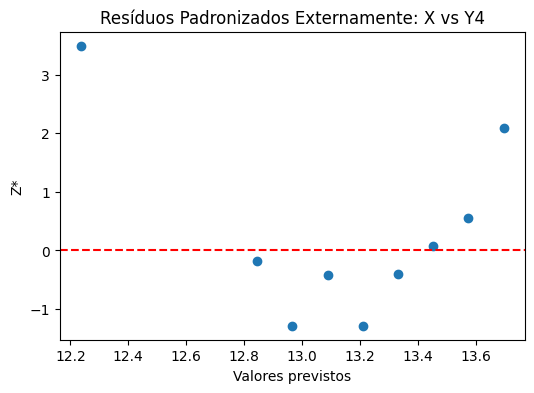

In [27]:
for col in ["Y1", "Y2", "Y3", "Y4"]:
    X_vals = sm.add_constant(df["X"])
    y_vals = df[col]
    modelo_sm = sm.OLS(y_vals, X_vals).fit()

    Zi_star = modelo_sm.get_influence().resid_studentized_external
    y_pred = modelo_sm.fittedvalues

    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, Zi_star)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"Resíduos Padronizados Externamente: X vs {col}")
    plt.xlabel("Valores previstos")
    plt.ylabel("Z*")
    plt.show()


### iv) Os elementos da diagonal hii da matriz de projeção H

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados
dados = {
    "X": [0, 1, 2, 3, 4, 5, 6, 7, 12],
    "Y1": [9.6, 8.4, 12.6, 15.1, 22.8, 19.1, 21.6, 24.0, 33.6],
    "Y2": [10.4, 11.2, 12.8, 13.9, 17.2, 21.6, 22.4, 22.9, 35.4],
    "Y3": [10.4, 11.4, 15.0, 15.9, 18.6, 21.5, 21.7, 25.3, 30.6],
    "Y4": [18.8, 15.4, 13.7, 11.9, 9.1, 11.6, 8.9, 12.2, 16.8]
}
df = pd.DataFrame(dados)
df.head()




,X,Y1,Y2,Y3,Y4
0,0,9.6,10.4,10.4,18.8
1,1,8.4,11.2,11.4,15.4
2,2,12.6,12.8,15.0,13.7
3,3,15.1,13.9,15.9,11.9
4,4,22.8,17.2,18.6,9.1


In [35]:
# Adicionar intercepto
X_vals = sm.add_constant(df["X"])
X_np = X_vals.to_numpy()

# Calcular matriz de projeção H
H = X_np @ np.linalg.inv(X_np.T @ X_np) @ X_np.T

# Elementos da diagonal
h_diag = np.diag(H)

# Criar DataFrame com resultados
h_diag_df = pd.DataFrame({
    "X": df["X"],
    "h_ii": h_diag
})

h_diag_df




,X,h_ii
0,0,0.297071
1,1,0.222803
2,2,0.167364
3,3,0.130753
4,4,0.112971
5,5,0.114017
6,6,0.133891
7,7,0.172594
8,12,0.648536


In [36]:
plt.figure(figsize=(6, 4))
plt.stem(h_diag_df["X"], h_diag_df["h_ii"], basefmt=" ", use_line_collection=True)
plt.title("Elementos h_ii da diagonal da matriz de projeção H")
plt.xlabel("X")
plt.ylabel("h_ii")
plt.show()


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 600x400 with 0 Axes>